<a href="https://colab.research.google.com/github/yuxuan0702/DS_TakeHome_Case-/blob/master/spanish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import test dataset 
test = pd.read_csv('/content/drive/My Drive/Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/AB TESTING Spanish Translation with solution/Translation_Test.zip (Unzipped Files)/test_table.csv',parse_dates=['date'],index_col=[0])
test.head()

,date,source,device,browser_language,ads_channel,browser,conversion,test
user_id,,,,,,,,
315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 315281 to 241662
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              453321 non-null  datetime64[ns]
 1   source            453321 non-null  object        
 2   device            453321 non-null  object        
 3   browser_language  453321 non-null  object        
 4   ads_channel       181877 non-null  object        
 5   browser           453321 non-null  object        
 6   conversion        453321 non-null  int64         
 7   test              453321 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.1+ MB


In [ ]:
# import user dataset 
user = pd.read_csv('/content/drive/My Drive/Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/AB TESTING Spanish Translation with solution/Translation_Test.zip (Unzipped Files)/user_table.csv',index_col=[0])
user.head()

,sex,age,country
user_id,,,
765821,M,20,Mexico
343561,F,27,Nicaragua
118744,M,23,Colombia
987753,F,27,Venezuela
554597,F,20,Spain


In [ ]:
# merge test and user based on user_id
df = pd.merge(test,user,how = 'left',left_index = True, right_index = True)
df

,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
user_id,,,,,,,,,,,
315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
...,...,...,...,...,...,...,...,...,...,...,...
425010,2015-12-04,SEO,Web,ES,NaN,FireFox,0,0,M,50.0,Mexico
826793,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,1,F,20.0,Colombia
514870,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,M,25.0,Spain


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 315281 to 241662
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              453321 non-null  datetime64[ns]
 1   source            453321 non-null  object        
 2   device            453321 non-null  object        
 3   browser_language  453321 non-null  object        
 4   ads_channel       181877 non-null  object        
 5   browser           453321 non-null  object        
 6   conversion        453321 non-null  int64         
 7   test              453321 non-null  int64         
 8   sex               452867 non-null  object        
 9   age               452867 non-null  float64       
 10  country           452867 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 61.5+ MB


# EDA

In [ ]:
# The average conversion rate across test 
df.groupby('test')['conversion'].agg(['mean','std'])

,mean,std
test,,
0,0.055179,0.228329
1,0.043425,0.203812


In [ ]:
df[df['test']==0].groupby('country')['conversion'].mean().sort_values(ascending = False)

country
Spain          0.079719
El Salvador    0.053554
Nicaragua      0.052647
Costa Rica     0.052256
Colombia       0.052089
Honduras       0.050906
Guatemala      0.050643
Venezuela      0.050344
Peru           0.049914
Mexico         0.049495
Bolivia        0.049369
Ecuador        0.049154
Paraguay       0.048493
Chile          0.048107
Panama         0.046796
Argentina      0.015071
Uruguay        0.012048
Name: conversion, dtype: float64

In [ ]:
df[df['test']==1].groupby('country')['conversion'].mean().sort_values(ascending = False)

country
Costa Rica     0.054738
Nicaragua      0.054177
Chile          0.051295
Mexico         0.051186
Peru           0.050604
Colombia       0.050571
Panama         0.049370
Paraguay       0.049229
Ecuador        0.048988
Venezuela      0.048978
Guatemala      0.048647
El Salvador    0.047947
Bolivia        0.047901
Honduras       0.047540
Argentina      0.013725
Uruguay        0.012907
Name: conversion, dtype: float64

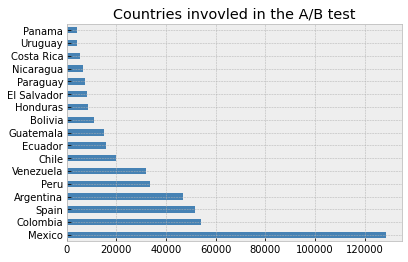

In [ ]:
# most country involved in the test
df.country.value_counts().plot(kind = 'barh',color = 'steelblue')
plt.title('Countries invovled in the A/B test')
plt.show()

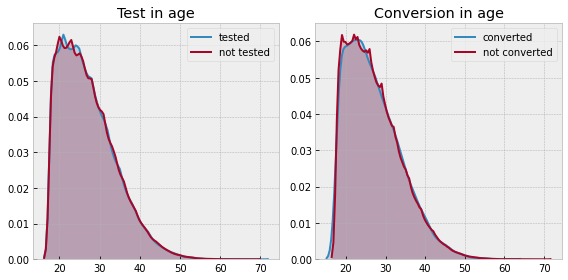

In [ ]:
# Age Distribution in test and conveersion 
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.kdeplot(df[df['test']==1]['age'],shade= True,label  = 'tested')
sns.kdeplot(df[df['test']==0]['age'],shade= True,label = 'not tested')
plt.title('Test in age')

plt.subplot(1,2,2)
sns.kdeplot(df[df['conversion']==1]['age'],shade= True,label  = 'converted')
sns.kdeplot(df[df['conversion']==0]['age'],shade= True,label = 'not converted')
plt.title('Conversion in age')

plt.legend()
plt.tight_layout()
plt.show()

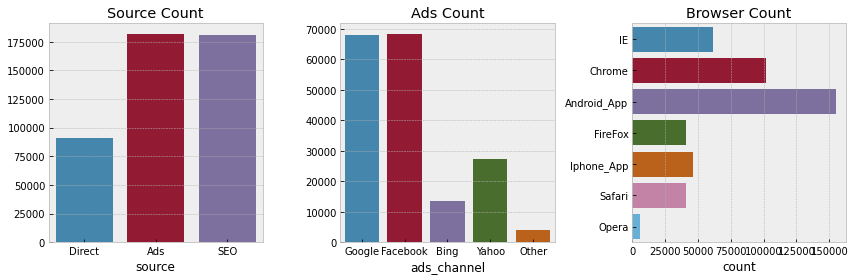

In [ ]:
# customer source, Ads Channel and Browers count 
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
sns.countplot(df.source)
plt.ylabel('')
plt.title('Source Count')

plt.subplot(1,3,2)
sns.countplot(df.ads_channel)
plt.title('Ads Count')
plt.ylabel('')

plt.subplot(1,3,3)
sns.countplot(y = df.browser)
plt.title('Browser Count')
plt.ylabel('')

plt.tight_layout()
plt.show()

browser
Android_App    0.056026
Chrome         0.054605
FireFox        0.057041
IE             0.054603
Iphone_App     0.054588
Opera          0.057134
Safari         0.052830
Name: conversion, dtype: float64

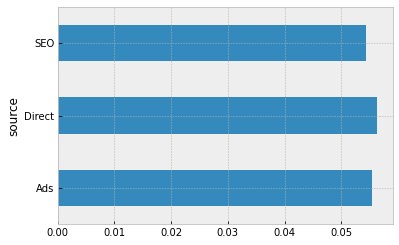

In [ ]:
df[df['test']==0].groupby('source')['conversion'].mean().plot(kind = 'barh')
df[df['test']==0].groupby('ads_channel')['conversion'].mean()
df[df['test']==0].groupby('browser')['conversion'].mean()